Example of ptocess weights to find most frequent genes for one of the experiments with features extracted from both domains simultaneously

In [15]:
from utils.weights import *

Uncomment next cell if you want to process your own experimental results

In [16]:
# PATH_RESULTS = './results_test/'

If you want to proceed to proper visualization of overlapping features, you might want to run the rest of the code for all three values of 'EXPERIMENT' variable (oncomment + Run ALl one by one)

In [17]:
DATA_NAME = '1_[res]_[sus, delayedSus]/'
EXPERIMENT = ['spleen', 'liver']
# EXPERIMENT = ['spleen']
# EXPERIMENT = ['liver']
weightsList = download_weights(DATA_NAME, EXPERIMENT)

Calculate cut-off threshold for absolute weights with the Elbow method

In [18]:
runs = len(weightsList)
W = np.vstack(weightsList)
W = np.sum(np.abs(W), axis = 0) / runs
sortedW = (-1)*np.sort((-1)*np.abs(W))
threshold = findThreshold(sortedW)

Set all weights to 1 if above threshold and 0 otherwise and calculate frequencies for all weights

In [19]:
weightsList = [np.where(_>(threshold), 1, 0) for _ in weightsList]
W = np.vstack(weightsList)
W = np.sum(np.abs(W), axis = 0) / runs
sortedW = (-1)*np.sort((-1)*np.abs(W))
sortedIndices = np.argsort((-1)*W)

Plot disrtributions and save in respective folder for results

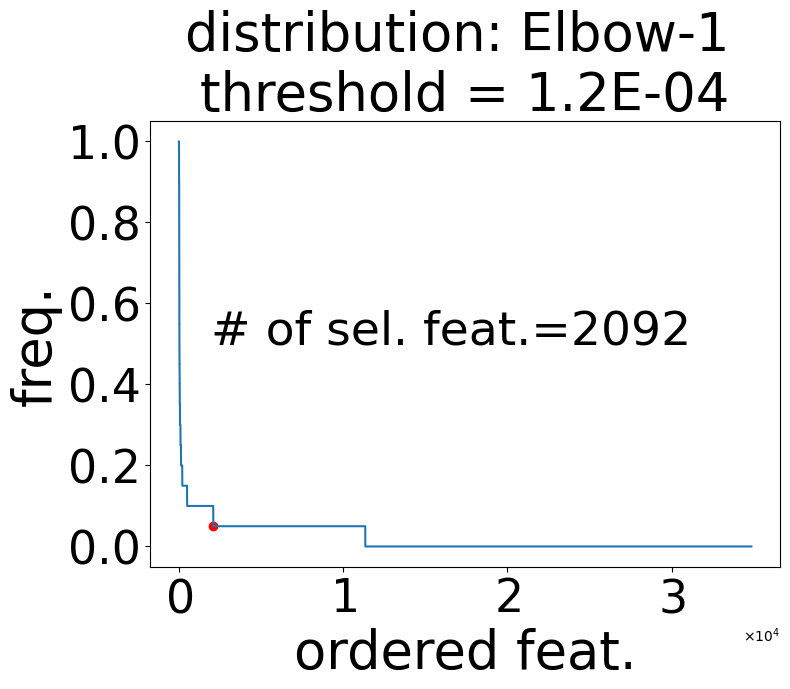

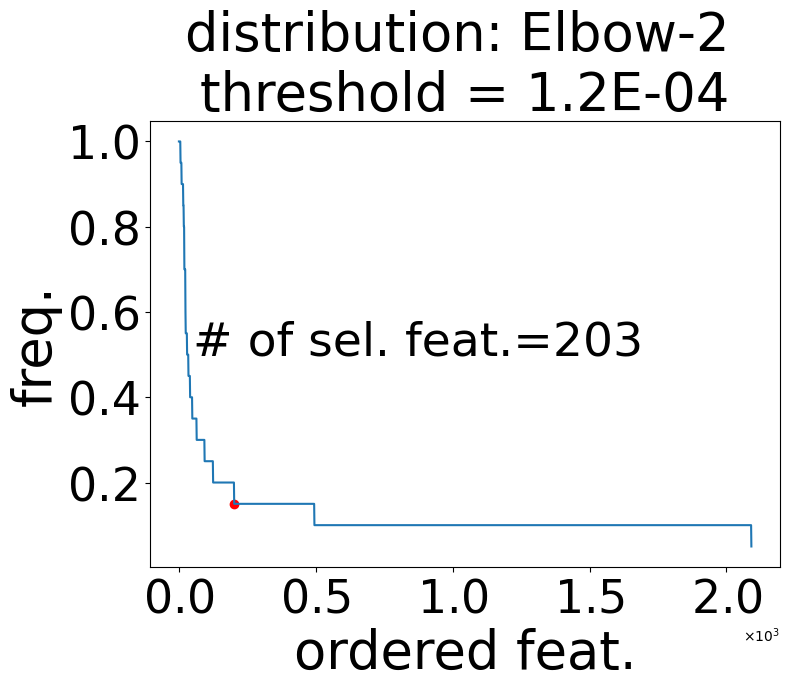

In [20]:
roundedThreshold = '%.1E' % Decimal(str(threshold))
Xtitle, Ytitle, scale, show = 'ordered feat.', 'freq.', True, True
maxDistIndex = plotElbow(DATA_NAME, EXPERIMENT, sortedW,'distribution: Elbow-1 \nthreshold = ' + roundedThreshold, Xtitle, Ytitle, 'Elbow1Freq', scale, show)
maxDistIndex1 = plotElbow(DATA_NAME, EXPERIMENT, sortedW[:maxDistIndex],'distribution: Elbow-2 \nthreshold = ' + roundedThreshold, Xtitle, Ytitle, 'Elbow2Freq', scale, show)


Save filtered genes. This code does nothing if data is not available (in fact it does if genesCommon.txt if available, we don't need all the data)

In [21]:
import os
from constants import *

if os.path.exists(PATH_DATA + DATA_NAME + "genesCommon.txt"):
    
    import pandas as pd

    genes = pd.read_csv(PATH_DATA + DATA_NAME + "genesCommon.txt", sep='\t', header=(0))['genes'].tolist()
    genesExtr1 =[genes[_] for _ in sortedIndices[:maxDistIndex]]
    genesExtr2 =[genes[_] for _ in sortedIndices[:maxDistIndex1]]

    if len(EXPERIMENT) >1:
        rootDir = PATH_RESULTS + DATA_NAME + 'all/'
    else:
        rootDir = PATH_RESULTS + DATA_NAME + EXPERIMENT[0] + '/'

    pd.DataFrame({'genes': genesExtr1, 'weights': sortedW[:maxDistIndex]}).to_csv(rootDir + "genesFreqExtr1.txt", index=False)
    pd.DataFrame({'genes': genesExtr2, 'weights': sortedW[:maxDistIndex1]}).to_csv(rootDir + "genesFreqExtr2.txt", index=False)